In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data


%matplotlib inline

In [3]:
mnist = input_data.read_data_sets('mnist/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Carregando as imagens

As imagens estão representadas como um array único. Isso significa que a imagem está como um array de 784 dimensões (28x28). Imagens são representadas como matrizes, geralmente. Então, em alguns algoritmos, há a necessidade de dar um reshape nela

In [4]:
x_train = mnist.train.images
y_train = mnist.train.labels
print(x_train.shape, y_train.shape)

x_test = mnist.test.images
y_test = mnist.test.labels
print(x_test.shape, y_test.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)


**O matplotlib não irá aceitar um array de 784 dimensões como uma imagem. Por isso, tem que dar o reshape**

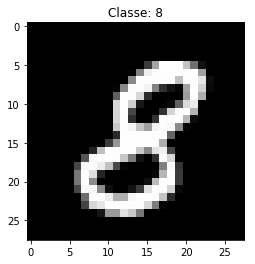

In [5]:
plt.title('Classe: {}'.format(np.argmax(y_train[5])))
plt.imshow(x_train[5].reshape(28,28), cmap='gray')

# Construção da arquitetura da Rede

In [6]:
# Definição do input. O numero de neuronios do input é o tamanho do array
NEURONIOS_INPUT = x_train.shape[1]


# Definição do numero de hidden Layers. Para esse exemplo, serão utilizados 3 hidden layers
# Utilizarei o mesmo nome do layer, pois eles serão entrada um do outro
NEURONIOS_HIDDEN = int((x_train.shape[1]+y_train.shape[1])/2)

# Definição do numero de neuronios da camada de saída. 
# Os neuronios dessa camada correspondem as classes possíveis. 

NEURONIOS_OUTPUT = y_train.shape[1]

In [7]:
print("Rede: {} -> {} -> {} -> {} -> {}".format(
    NEURONIOS_INPUT,
    NEURONIOS_HIDDEN,
    NEURONIOS_HIDDEN,
    NEURONIOS_HIDDEN,
    NEURONIOS_OUTPUT
))

Rede: 784 -> 397 -> 397 -> 397 -> 10


## Definindo numero de camadas da rede

TODO: Tentativa de identificar o numero de camadas da rede para criar um loop que inicializa os pesos e bias da rede

In [8]:
NUMERO_HIDDEN_LAYERS = 3

# O total de layers dessa rede, nessa arquitetura (DenseNN), é 1 input layer
# 1 output layer e N hidden layers. Por isso, tem-se que o numero total de layers é:

TOTAL_LAYES = NUMERO_HIDDEN_LAYERS + 2

## Criando os pesos e bias da rede

In [9]:
pesos = {
    'oculta1': tf.Variable(tf.random_normal([NEURONIOS_INPUT, NEURONIOS_HIDDEN])),
    'oculta2': tf.Variable(tf.random_normal([NEURONIOS_HIDDEN, NEURONIOS_HIDDEN])),
    'oculta3':tf.Variable(tf.random_normal([NEURONIOS_HIDDEN, NEURONIOS_HIDDEN])),
    'saida':  tf.Variable(tf.random_normal([NEURONIOS_HIDDEN, NEURONIOS_OUTPUT]))
}

bias = {
    'oculta1': tf.Variable(tf.random_normal([NEURONIOS_HIDDEN])),
    'oculta2': tf.Variable(tf.random_normal([NEURONIOS_HIDDEN])),
    'oculta3':tf.Variable(tf.random_normal([NEURONIOS_HIDDEN])),
    'saida':  tf.Variable(tf.random_normal([NEURONIOS_OUTPUT]))
}

## Definição dos placeholders para a nossa rede

In [10]:
xph = tf.placeholder(dtype=tf.float32, shape=[None, NEURONIOS_INPUT])
yph = tf.placeholder(dtype=tf.float32, shape=[None, NEURONIOS_OUTPUT])

## Definição das funções de ativação

Lembre-se que não é realizado essa operação para a `camada de input`. Os valores da camada de input são os próprios inputs!

In [24]:
def mlp(inputs, pesos, bias):

    valores_camada_oculta = tf.nn.relu(
        tf.add(
            tf.matmul(inputs, pesos['oculta1']), #camada 1
            bias['oculta1'])
    )

    valores_camada_oculta = tf.nn.relu(
        tf.add(
            tf.matmul(valores_camada_oculta, pesos['oculta2']), #camada 2
            bias['oculta2'])
    )
    valores_camada_oculta = tf.nn.relu(
        tf.add(
            tf.matmul(valores_camada_oculta, pesos['oculta3']), #camada 3
            bias['oculta3'])
    )

    valores_camada_saida = tf.add(
            tf.matmul(valores_camada_oculta, pesos['saida']),  # saida
            bias['saida'])
    
    
    return valores_camada_saida

In [25]:
modelo = mlp(xph, pesos, bias)
erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=modelo, labels=yph))
otimizador = tf.train.AdamOptimizer().minimize(erro)

In [ ]:
EPOCAS = 6000

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # No treinamento da rede, percorreremos todos os Registros disponíveis
    # em cada uma das épocas! Então, se o dado tiver 100k exemplos,
    # o codigo abaixo percorrerá 100k exemplos N vezes.
    for epoca in range(EPOCAS):
        
        # Entretando, calculamos o erro da rede a cada 128 registros
        x_batch, y_batch = mnist.train.next_batch(128)
        _, custo = sess.run([otimizador, erro], feed_dict={xph: x_batch, yph: y_batch})
        
        if epoca%100 == 0:
            print('Epoca: {} - Erro: {}'.format(epoca, custo))
    
    # Dou um sess.run nos pesos e bias e atribuo o resultado para duas variaveis
    # Assim, posso utilizar essas variaveis para fazer minhas predições
    w, b = sess.run([pesos, bias]) 
    print('Treinamento terminado')

Epoca: 0 - Erro: 35660.25390625
Epoca: 100 - Erro: 2843.841796875
Epoca: 200 - Erro: 1508.28662109375
Epoca: 300 - Erro: 1394.343505859375
Epoca: 400 - Erro: 863.279052734375
Epoca: 500 - Erro: 1472.333251953125
Epoca: 600 - Erro: 1097.703857421875
Epoca: 700 - Erro: 515.0111694335938
Epoca: 800 - Erro: 701.1586303710938
Epoca: 900 - Erro: 866.971435546875
Epoca: 1000 - Erro: 384.2241516113281
Epoca: 1100 - Erro: 669.527099609375
Epoca: 1200 - Erro: 290.841064453125
Epoca: 1300 - Erro: 442.1612548828125
Epoca: 1400 - Erro: 90.76585388183594
Epoca: 1500 - Erro: 121.48046875
Epoca: 1600 - Erro: 270.4407043457031
Epoca: 1700 - Erro: 184.67959594726562
Epoca: 1800 - Erro: 243.09967041015625
Epoca: 1900 - Erro: 48.79304122924805
Epoca: 2000 - Erro: 196.09963989257812


## Visualização dos pesos e bias dessa rede

In [ ]:
print(w, b)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    previsoes =  tf.nn.softmax(mlp(xph, w, b))
    previsao = sess.run(previsoes, feed_dict={xph: x_test})
    previsao = tf.argmax(previsao, axis=1)
    previsao = sess.run(previsao)

In [ ]:
previsao